In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### *Load data*

In [2]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\KLD.csv'
df_KLD = pd.read_csv(filename)

In [3]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI\\output\\TRGAN_Michele_NEI64_KW1_SW1_NGO32_LR0.00002_AR1.e-1_VG0_OL0\\train_history.csv'
df_train_history = pd.read_csv(filename)

In [4]:
ckpt1, ckpt2, ckpt3 = np.argmin(df_train_history['val_mse_loss']), np.argmin(df_train_history['val_gen_loss']) - 1, np.argmin(df_train_history['val_gen_loss'])

$\mathcal{L}_{rec}$ reaches minimum on validation data at epoch=383, and $\mathcal{L}_{G}$ reaches minimum on validation data at epoch=470.  
epoch=383, 469 and 470 are indicated by vertical dashed lines below.

In [5]:
# The discriminator output
discrim_fake_output_train = np.exp(-df_train_history['adversarial_loss'])
discrim_fake_output_dev = np.exp(-df_train_history['val_adversarial_loss'])

In [6]:
print( discrim_fake_output_dev[ckpt1], discrim_fake_output_dev[ckpt2], discrim_fake_output_dev[ckpt3] )

0.49443998976553394 0.49559400101239875 0.5210453004097328


In [7]:
print( df_train_history['val_adversarial_loss'][ckpt1], df_train_history['val_adversarial_loss'][ckpt2], df_train_history['val_adversarial_loss'][ckpt3] )

0.7043294906616211 0.701998233795166 0.6519182920455933


### *Plot the KL divergence.*

Text(0.15, 0.9, '(a)')

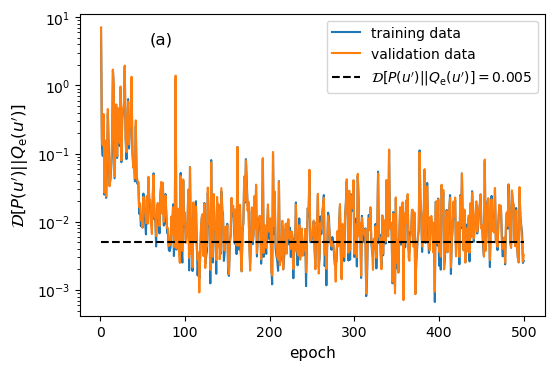

In [8]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]$', fontsize=12)

plt.plot(df_KLD.index+1, df_KLD['KLD_train'], label='training data')
plt.plot(df_KLD.index+1, df_KLD['KLD_dev'], label='validation data')

# The line $\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$
plt.plot([1,500], [5.e-3,5.e-3], '--k', label='$\mathcal{D}[P(u^\prime)||Q_{\mathrm{e}}(u^\prime)]=0.005$')

plt.legend()

plt.annotate('(a)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

### *Plot the discriminator output.*

Text(0.15, 0.9, '(b)')

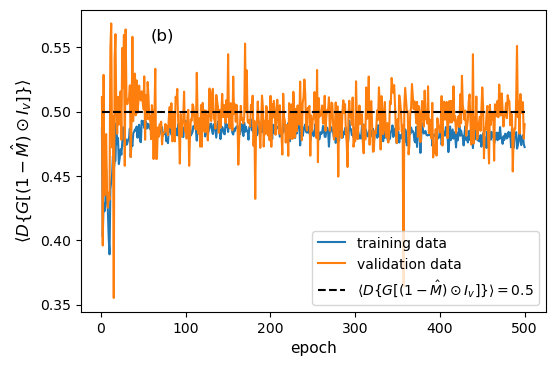

In [9]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel(r'$\langle D\{G[(1-\hat{M})\odot I_v]\}\rangle$', fontsize=12)

plt.plot(df_train_history.index+1, discrim_fake_output_train, label='training data')
plt.plot(df_train_history.index+1, discrim_fake_output_dev, label='validation data')

# The line $\langle D\{G[(1-\hat{M})\odot I_v]\}\rangle=0.5$
plt.plot([1,500], [0.5,0.5], '--k', label=r'$\langle D\{G[(1-\hat{M})\odot I_v]\}\rangle=0.5$')

plt.legend()

plt.annotate('(b)', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

### *The correlation between the adversarial loss and KL divergence*

In [10]:
ckpt4, ckpt5 = 100+np.argmax(df_KLD['KLD_dev'][200:]), 200+np.argmax(df_KLD['KLD_dev'][200:])

In [11]:
print(df_KLD['KLD_dev'][ckpt4], discrim_fake_output_dev[ckpt4], df_train_history['val_adversarial_loss'][ckpt4])

0.0038237452176009094 0.514407242834659 0.6647400259971619


In [12]:
print(df_KLD['KLD_dev'][ckpt5], discrim_fake_output_dev[ckpt5], df_train_history['val_adversarial_loss'][ckpt5])

0.11471388588955472 0.5080158774465882 0.6772425770759583
